In [14]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# Constants
resume_api = 'https://jennjwang.pythonanywhere.com'
candidate_api = 'https://heonlee.pythonanywhere.com/'
num_entries = 1

np.random.seed(0)

def generate_data(num_entries):
    # Generate synthetic data with variability
    degrees = ["Bachelor's", "Master's", "PhD"]
    genders = ["F", "M", "N/A"]
    ethnicities = ['White', 'Black', 'Native American', 'Asian American & Pacific Islander', 'Other']

    data = {
        'Applicant ID': range(1, 1 + num_entries),
        'School Name': "Brown University",
        'GPA': 3.50,
        'Degree': np.random.choice(degrees, num_entries),
        'Location': "Providence",
        'Gender': np.random.choice(genders, num_entries),
        'Veteran status': 0,
        'Work authorization': 0,
        'Disability': 0,
        'Ethnicity': np.random.choice(ethnicities, num_entries),
        'Role 1': 'Financial Analyst',
        'Start 1': '2/15',
        'End 1': '9/15',
        'Role 2': 'Web Developer',
        'Start 2': '10/15',
        'End 2': '12/15',
        'Role 3': 'N/A',
        'Start 3': 'N/A',
        'End 3': 'N/A'
    }
    return pd.DataFrame(data)

def send_api_request(api_url, data):
    headers = {'Content-Type': 'application/json'}
    json_data = data.to_json(orient='records')
    response = requests.post(api_url, data=json_data, headers=headers)
    return eval(response.json()['prediction'])

def main():
    n_repeat = 4000
    generated_data = generate_data(n_repeat)
    generated_data.to_csv('generated_data.csv', index=False)

    # Send data to APIs and append scores
    predictions = send_api_request(resume_api, generated_data)
    generated_data['score'] = [float(pred['score']) for pred in predictions]

    predictions = send_api_request(candidate_api, generated_data)
    generated_data['prediction'] = [int(pred['prediction']) for pred in predictions]

    # Calculate statistics
    stats = generated_data.groupby(['Degree', 'Gender', 'Ethnicity']).agg({'prediction': ['mean', 'std']}).reset_index()
    print(stats)
    return generated_data, stats

if __name__ == "__main__":
    df, stats = main()



        Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.448276  0.500200
1   Bachelor's      F                              Black   0.358025  0.482407
2   Bachelor's      F                    Native American   0.383838  0.488794
3   Bachelor's      F                              Other   0.423529  0.497050
4   Bachelor's      F                              White   0.382979  0.488720
5   Bachelor's      M  Asian American & Pacific Islander   0.611650  0.489758
6   Bachelor's      M                              Black   0.687500  0.465946
7   Bachelor's      M                    Native American   0.574468  0.497074
8   Bachelor's      M                              Other   0.604651  0.491793
9   Bachelor's      M                              White   0.540230  0.501268
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000

In [3]:
df.to_csv('controlled_data.csv')

In [4]:
stats

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.448276  0.500200
1   Bachelor's      F                              Black   0.358025  0.482407
2   Bachelor's      F                    Native American   0.383838  0.488794
3   Bachelor's      F                              Other   0.423529  0.497050
4   Bachelor's      F                              White   0.382979  0.488720
5   Bachelor's      M  Asian American & Pacific Islander   0.611650  0.489758
6   Bachelor's      M                              Black   0.687500  0.465946
7   Bachelor's      M                    Native American   0.574468  0.497074
8   Bachelor's      M                              Other   0.604651  0.491793
9   Bachelor's      M                              White   0.540230  0.501268
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.464286  0.501718
16    Master's      F                              Black   0.392157  0.490642
17    Master's      F                    Native American   0.352941  0.480721
18    Master's      F                              Other   0.362637  0.483425
19    Master's      F                              White   0.383838  0.488794
20    Master's      M  Asian American & Pacific Islander   0.666667  0.474342
21    Master's      M                              Black   0.755102  0.432238
22    Master's      M                    Native American   0.691589  0.464011
23    Master's      M                              Other   0.530000  0.501614
24    Master's      M                              White   0.555556  0.499688
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.462366  0.501284
31         PhD      F                              Black   0.340000  0.476095
32         PhD      F                    Native American   0.406593  0.493919
33         PhD      F                              Other   0.421053  0.497009
34         PhD      F                              White   0.425287  0.497253
35         PhD      M  Asian American & Pacific Islander   0.619469  0.487680
36         PhD      M                              Black   0.586667  0.495748
37         PhD      M                    Native American   0.621053  0.487699
38         PhD      M                              Other   0.544304  0.501216
39         PhD      M                              White   0.580645  0.496128
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

In [5]:
stats[stats['Degree'] == "Bachelor's"]

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.448276  0.500200
1   Bachelor's      F                              Black   0.358025  0.482407
2   Bachelor's      F                    Native American   0.383838  0.488794
3   Bachelor's      F                              Other   0.423529  0.497050
4   Bachelor's      F                              White   0.382979  0.488720
5   Bachelor's      M  Asian American & Pacific Islander   0.611650  0.489758
6   Bachelor's      M                              Black   0.687500  0.465946
7   Bachelor's      M                    Native American   0.574468  0.497074
8   Bachelor's      M                              Other   0.604651  0.491793
9   Bachelor's      M                              White   0.540230  0.501268
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000

In [6]:
df.groupby(['Degree', 'Gender']).agg({'prediction': ['mean', 'std']}).reset_index()

Degree Gender prediction          
                           mean       std
0  Bachelor's      F   0.399103  0.490264
1  Bachelor's      M   0.605150  0.489344
2  Bachelor's    N/A   0.000000  0.000000
3    Master's      F   0.390456  0.488382
4    Master's      M   0.640756  0.480284
5    Master's    N/A   0.000000  0.000000
6         PhD      F   0.409396  0.492273
7         PhD      M   0.593407  0.491738
8         PhD    N/A   0.000000  0.000000

In [7]:
df.groupby(['Degree', 'Ethnicity']).agg({'prediction': ['mean', 'std']}).reset_index()

Degree                          Ethnicity prediction          
                                                        mean       std
0   Bachelor's  Asian American & Pacific Islander   0.387833  0.488185
1   Bachelor's                              Black   0.372549  0.484434
2   Bachelor's                    Native American   0.329749  0.470967
3   Bachelor's                              Other   0.357724  0.480307
4   Bachelor's                              White   0.304029  0.460840
5     Master's  Asian American & Pacific Islander   0.392405  0.489320
6     Master's                              Black   0.390411  0.488680
7     Master's                    Native American   0.388060  0.488220
8     Master's                              Other   0.293515  0.456152
9     Master's                              White   0.342412  0.475443
10         PhD  Asian American & Pacific Islander   0.384354  0.487272
11         PhD                              Black   0.278571  0.449099
12         PhD                    Native American   0.358209  0.480371
13         PhD                              Other   0.324675  0.469270
14         PhD                              White   0.344697  0.476172

Changed Start and End date

In [8]:
# Constants
resume_api = 'https://jennjwang.pythonanywhere.com'
candidate_api = 'https://heonlee.pythonanywhere.com/'
num_entries = 1

np.random.seed(0)

def generate_data(num_entries):
    # Generate synthetic data with variability
    degrees = ["Bachelor's", "Master's", "PhD"]
    genders = ["F", "M", "N/A"]
    ethnicities = ['White', 'Black', 'Native American', 'Asian American & Pacific Islander', 'Other']

    data = {
        'Applicant ID': range(1, 1 + num_entries),
        'School Name': "Brown University",
        'GPA': 3.50,
        'Degree': np.random.choice(degrees, num_entries),
        'Location': "Providence",
        'Gender': np.random.choice(genders, num_entries),
        'Veteran status': 0,
        'Work authorization': 0,
        'Disability': 0,
        'Ethnicity': np.random.choice(ethnicities, num_entries),
        'Role 1': 'Financial Analyst',
        'Start 1': '2/15',
        'End 1': '9/15',
        'Role 2': 'Web Developer',
        'Start 2': '10/16',
        'End 2': '12/16',
        'Role 3': 'N/A',
        'Start 3': 'N/A',
        'End 3': 'N/A'
    }
    return pd.DataFrame(data)

def send_api_request(api_url, data):
    headers = {'Content-Type': 'application/json'}
    json_data = data.to_json(orient='records')
    response = requests.post(api_url, data=json_data, headers=headers)
    return eval(response.json()['prediction'])

def main():
    n_repeat = 4000
    generated_data = generate_data(n_repeat)
    generated_data.to_csv('generated_data.csv', index=False)

    # Send data to APIs and append scores
    predictions = send_api_request(resume_api, generated_data)
    generated_data['score'] = [float(pred['score']) for pred in predictions]

    predictions = send_api_request(candidate_api, generated_data)
    generated_data['prediction'] = [int(pred['prediction']) for pred in predictions]

    # Calculate statistics
    stats2 = generated_data.groupby(['Degree', 'Gender', 'Ethnicity']).agg({'prediction': ['mean', 'std']}).reset_index()
    print(stats2)
    return generated_data, stats2

if __name__ == "__main__":
    df, stats2 = main()



        Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.413793  0.495367
1   Bachelor's      F                              Black   0.419753  0.496593
2   Bachelor's      F                    Native American   0.464646  0.501287
3   Bachelor's      F                              Other   0.529412  0.502096
4   Bachelor's      F                              White   0.329787  0.472657
5   Bachelor's      M  Asian American & Pacific Islander   0.660194  0.475959
6   Bachelor's      M                              Black   0.614583  0.489248
7   Bachelor's      M                    Native American   0.734043  0.444211
8   Bachelor's      M                              Other   0.697674  0.461959
9   Bachelor's      M                              White   0.574713  0.497253
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000

In [9]:
display(stats2)

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.413793  0.495367
1   Bachelor's      F                              Black   0.419753  0.496593
2   Bachelor's      F                    Native American   0.464646  0.501287
3   Bachelor's      F                              Other   0.529412  0.502096
4   Bachelor's      F                              White   0.329787  0.472657
5   Bachelor's      M  Asian American & Pacific Islander   0.660194  0.475959
6   Bachelor's      M                              Black   0.614583  0.489248
7   Bachelor's      M                    Native American   0.734043  0.444211
8   Bachelor's      M                              Other   0.697674  0.461959
9   Bachelor's      M                              White   0.574713  0.497253
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.452381  0.500717
16    Master's      F                              Black   0.343137  0.477101
17    Master's      F                    Native American   0.400000  0.492805
18    Master's      F                              Other   0.373626  0.486446
19    Master's      F                              White   0.404040  0.493203
20    Master's      M  Asian American & Pacific Islander   0.629630  0.485913
21    Master's      M                              Black   0.632653  0.484561
22    Master's      M                    Native American   0.607477  0.490610
23    Master's      M                              Other   0.580000  0.496045
24    Master's      M                              White   0.655556  0.477849
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.301075  0.461212
31         PhD      F                              Black   0.370000  0.485237
32         PhD      F                    Native American   0.417582  0.495893
33         PhD      F                              Other   0.539474  0.501751
34         PhD      F                              White   0.367816  0.485006
35         PhD      M  Asian American & Pacific Islander   0.619469  0.487680
36         PhD      M                              Black   0.706667  0.458356
37         PhD      M                    Native American   0.652632  0.478660
38         PhD      M                              Other   0.670886  0.472894
39         PhD      M                              White   0.548387  0.500351
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

In [10]:
display(stats), display(stats2)

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.448276  0.500200
1   Bachelor's      F                              Black   0.358025  0.482407
2   Bachelor's      F                    Native American   0.383838  0.488794
3   Bachelor's      F                              Other   0.423529  0.497050
4   Bachelor's      F                              White   0.382979  0.488720
5   Bachelor's      M  Asian American & Pacific Islander   0.611650  0.489758
6   Bachelor's      M                              Black   0.687500  0.465946
7   Bachelor's      M                    Native American   0.574468  0.497074
8   Bachelor's      M                              Other   0.604651  0.491793
9   Bachelor's      M                              White   0.540230  0.501268
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.464286  0.501718
16    Master's      F                              Black   0.392157  0.490642
17    Master's      F                    Native American   0.352941  0.480721
18    Master's      F                              Other   0.362637  0.483425
19    Master's      F                              White   0.383838  0.488794
20    Master's      M  Asian American & Pacific Islander   0.666667  0.474342
21    Master's      M                              Black   0.755102  0.432238
22    Master's      M                    Native American   0.691589  0.464011
23    Master's      M                              Other   0.530000  0.501614
24    Master's      M                              White   0.555556  0.499688
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.462366  0.501284
31         PhD      F                              Black   0.340000  0.476095
32         PhD      F                    Native American   0.406593  0.493919
33         PhD      F                              Other   0.421053  0.497009
34         PhD      F                              White   0.425287  0.497253
35         PhD      M  Asian American & Pacific Islander   0.619469  0.487680
36         PhD      M                              Black   0.586667  0.495748
37         PhD      M                    Native American   0.621053  0.487699
38         PhD      M                              Other   0.544304  0.501216
39         PhD      M                              White   0.580645  0.496128
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

Degree Gender                          Ethnicity prediction          
                                                               mean       std
0   Bachelor's      F  Asian American & Pacific Islander   0.413793  0.495367
1   Bachelor's      F                              Black   0.419753  0.496593
2   Bachelor's      F                    Native American   0.464646  0.501287
3   Bachelor's      F                              Other   0.529412  0.502096
4   Bachelor's      F                              White   0.329787  0.472657
5   Bachelor's      M  Asian American & Pacific Islander   0.660194  0.475959
6   Bachelor's      M                              Black   0.614583  0.489248
7   Bachelor's      M                    Native American   0.734043  0.444211
8   Bachelor's      M                              Other   0.697674  0.461959
9   Bachelor's      M                              White   0.574713  0.497253
10  Bachelor's    N/A  Asian American & Pacific Islander   0.000000  0.000000
11  Bachelor's    N/A                              Black   0.000000  0.000000
12  Bachelor's    N/A                    Native American   0.000000  0.000000
13  Bachelor's    N/A                              Other   0.000000  0.000000
14  Bachelor's    N/A                              White   0.000000  0.000000
15    Master's      F  Asian American & Pacific Islander   0.452381  0.500717
16    Master's      F                              Black   0.343137  0.477101
17    Master's      F                    Native American   0.400000  0.492805
18    Master's      F                              Other   0.373626  0.486446
19    Master's      F                              White   0.404040  0.493203
20    Master's      M  Asian American & Pacific Islander   0.629630  0.485913
21    Master's      M                              Black   0.632653  0.484561
22    Master's      M                    Native American   0.607477  0.490610
23    Master's      M                              Other   0.580000  0.496045
24    Master's      M                              White   0.655556  0.477849
25    Master's    N/A  Asian American & Pacific Islander   0.000000  0.000000
26    Master's    N/A                              Black   0.000000  0.000000
27    Master's    N/A                    Native American   0.000000  0.000000
28    Master's    N/A                              Other   0.000000  0.000000
29    Master's    N/A                              White   0.000000  0.000000
30         PhD      F  Asian American & Pacific Islander   0.301075  0.461212
31         PhD      F                              Black   0.370000  0.485237
32         PhD      F                    Native American   0.417582  0.495893
33         PhD      F                              Other   0.539474  0.501751
34         PhD      F                              White   0.367816  0.485006
35         PhD      M  Asian American & Pacific Islander   0.619469  0.487680
36         PhD      M                              Black   0.706667  0.458356
37         PhD      M                    Native American   0.652632  0.478660
38         PhD      M                              Other   0.670886  0.472894
39         PhD      M                              White   0.548387  0.500351
40         PhD    N/A  Asian American & Pacific Islander   0.000000  0.000000
41         PhD    N/A                              Black   0.000000  0.000000
42         PhD    N/A                    Native American   0.000000  0.000000
43         PhD    N/A                              Other   0.000000  0.000000
44         PhD    N/A                              White   0.000000  0.000000

(None, None)

In [11]:
df.groupby(['Degree', 'Gender']).agg({'prediction': ['mean', 'std']}).reset_index()

Degree Gender prediction          
                           mean       std
0  Bachelor's      F   0.430493  0.495701
1  Bachelor's      M   0.656652  0.475337
2  Bachelor's    N/A   0.000000  0.000000
3    Master's      F   0.392625  0.488865
4    Master's      M   0.619748  0.485959
5    Master's    N/A   0.000000  0.000000
6         PhD      F   0.393736  0.489125
7         PhD      M   0.635165  0.481914
8         PhD    N/A   0.000000  0.000000

Relevancy between Resume score and Call-back rate

In [12]:
df

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,score,prediction
0,1,Brown University,3.5,Bachelor's,Providence,N/A,0,0,0,Black,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,6.77,0
1,2,Brown University,3.5,Master's,Providence,M,0,0,0,Black,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,0.10,0
2,3,Brown University,3.5,Bachelor's,Providence,M,0,0,0,Native American,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,4.81,1
3,4,Brown University,3.5,Master's,Providence,F,0,0,0,Native American,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,8.25,1
4,5,Brown University,3.5,Master's,Providence,M,0,0,0,Native American,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,4.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Asian American & Pacific Islander,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,1.80,0
3996,3997,Brown University,3.5,Bachelor's,Providence,N/A,0,0,0,Other,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,5.81,0
3997,3998,Brown University,3.5,PhD,Providence,M,0,0,0,Asian American & Pacific Islander,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,0.38,1
3998,3999,Brown University,3.5,Master's,Providence,N/A,0,0,0,Asian American & Pacific Islander,...,2/15,9/15,Web Developer,10/16,12/16,N/A,N/A,N/A,9.05,0


Candidate Evaluation using Random dataset and Controlled dataset

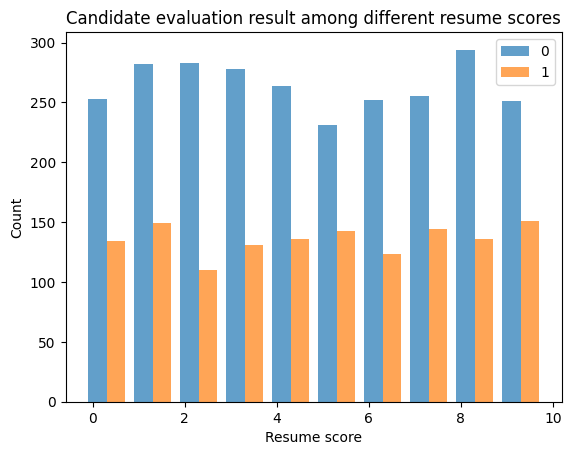

In [15]:
# random_data.csv

df = pd.read_csv("random_data.csv")
candidate_eval = pd.read_csv('result.csv')

df['prediction'] = candidate_eval['prediction']

df['score'] = df['score'].astype(float)
df['prediction'] = df['prediction'].astype(int)

n_bins = 10

bin_edges = np.histogram_bin_edges(df['score'], bins=n_bins)
hist_data = [np.histogram(df[df['prediction'] == i]['score'], bins=bin_edges)[0] for i in range(2)]

total_width = np.diff(bin_edges).mean() * 0.8
width = total_width / 2
gaps = np.diff(bin_edges).mean() * 0.1

positions = [bin_edges[:-1] + gaps + i * width for i in range(2)]

labels = ['0', '1']
for pos, data, label in zip(positions, hist_data, labels):
    plt.bar(pos, data, width=width, label=label, alpha=0.7)

# Add legend and labels
plt.legend()
plt.xlabel('Resume score')
plt.ylabel('Count')
plt.title('Candidate evaluation result among different resume scores')

plt.show()


In [16]:
df

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,score,prediction
0,1,Roger Williams University,2.75,Master's,Jacksonville,M,NaN,0,0.0,Native American,...,7/16,9/16,Financial Analyst,10/16,12/16,Sales Representative,1/17,5/17,8.09,0
1,2,Brown University,2.39,Bachelor's,Austin,NaN,NaN,1,1.0,Other,...,11/15,11/15,Machine Learning Engineer,12/15,12/15,Software Engineer,1/16,5/16,0.71,0
2,3,Providence College,3.18,Master's,San Antonio,NaN,1.0,1,0.0,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.76,0
3,4,Providence College,3.00,PhD,San Jose,NaN,0.0,1,NaN,Asian American & Pacific Islander,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.46,0
4,5,Rhode Island College,2.68,PhD,Providence,F,NaN,1,0.0,Other,...,6/22,10/22,Machine Learning Engineer,11/22,11/22,Product Manager,12/22,12/22,7.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Providence College,3.42,Master's,Charlotte,M,NaN,1,0.0,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
3996,3997,Johnson & Wales University,2.33,PhD,New York,M,0.0,1,NaN,White,...,3/19,3/19,Marketing Coordinator,4/19,6/19,Sales Representative,7/19,12/19,3.79,1
3997,3998,Rhode Island College,2.47,Master's,Austin,NaN,NaN,1,1.0,Other,...,1/22,7/22,Financial Analyst,8/22,8/22,Data Scientist,9/22,9/22,1.65,0
3998,3999,Roger Williams University,3.17,Bachelor's,Charlotte,M,1.0,1,1.0,Native American,...,12/17,12/17,NaN,NaN,NaN,NaN,NaN,NaN,9.56,1


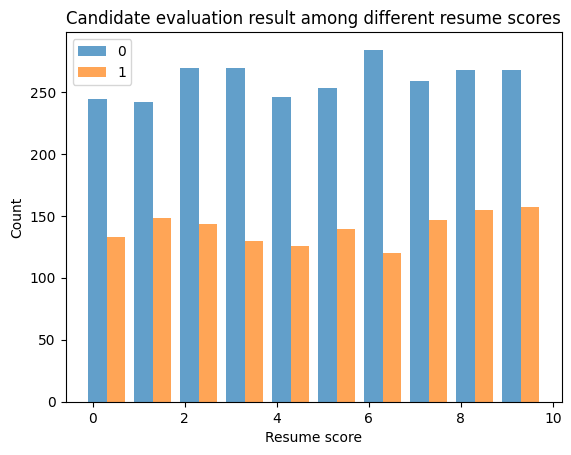

In [17]:
# controlled_data.csv

df = pd.read_csv('controlled_data.csv')

n_bins = 10

bin_edges = np.histogram_bin_edges(df['score'], bins=n_bins)
hist_data = [np.histogram(df[df['prediction'] == i]['score'], bins=bin_edges)[0] for i in range(2)]

total_width = np.diff(bin_edges).mean() * 0.8
width = total_width / 2
gaps = np.diff(bin_edges).mean() * 0.1

positions = [bin_edges[:-1] + gaps + i * width for i in range(2)]

labels = ['0', '1']
for pos, data, label in zip(positions, hist_data, labels):
    plt.bar(pos, data, width=width, label=label, alpha=0.7)

# Add legend and labels
plt.legend()
plt.xlabel('Resume score')
plt.ylabel('Count')
plt.title('Candidate evaluation result among different resume scores')

plt.show()


Call-back Rate results

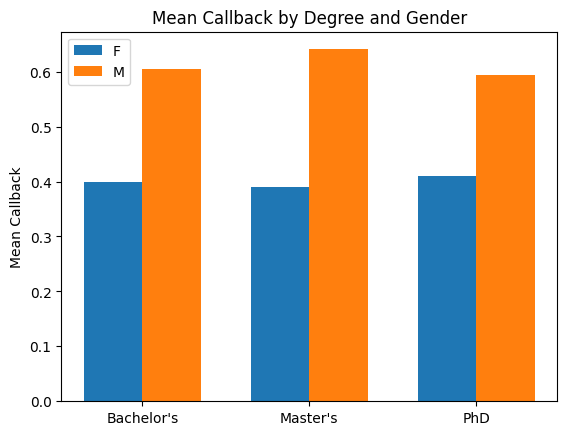

<Figure size 640x480 with 0 Axes>

In [18]:
results = pd.DataFrame(df.groupby(['Degree', 'Gender']).agg({'prediction': ['mean', 'std']}).reset_index())

plot_df = pd.DataFrame({'Degree': results['Degree'],
                       'Gender': results['Gender'],
                       'mean_callback': results['prediction']['mean']})

# List of unique degrees
degrees = plot_df['Degree'].unique()

# List of unique genders
genders = plot_df['Gender'].unique()

# Generating positions for the bars
x = np.arange(len(degrees))

# Width of each bar
width = 0.35

# Plotting
fig, ax = plt.subplots()
for i, gender in enumerate(genders):
    mean_vals = plot_df[plot_df['Gender'] == gender]['mean_callback']
    ax.bar(x + i*width, mean_vals, width, label=gender)

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Mean Callback')
ax.set_title('Mean Callback by Degree and Gender')
ax.set_xticks(x + width/2)
ax.set_xticklabels(degrees)
ax.legend()

# Adding labels to each bar
for i, degree in enumerate(degrees):
    for j, gender in enumerate(genders):
        mean_val = plot_df[(plot_df['Degree'] == degree) & (plot_df['Gender'] == gender)]['mean_callback'].iloc[0]
        # plt.text(i + (j-0.5)*width, mean_val+0.5, str(mean_val), ha='center')

plt.show()
plt.savefig("results_graph")

Proving Resume score is uniformly distributed

In [20]:
df['score'].describe()

count    4000.000000
mean        5.082855
std         2.897581
min         0.000000
25%         2.560000
50%         5.145000
75%         7.630000
max        10.000000
Name: score, dtype: float64

(array([377., 390., 412., 399., 372., 392., 404., 406., 423., 425.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

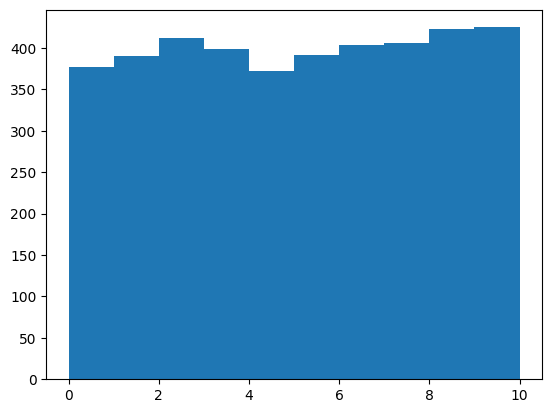

In [21]:
import matplotlib.pyplot as plt

plt.hist(df['score'])

Fairness Metrics

In [22]:
def di(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    """
    Calculate the Disparate Impact (DI) between majority and minority classes based on predicted labels.

    Parameters:
    - sensitive_attribute (str): Name of the column representing the sensitive attribute.
    - dataset (pd.DataFrame): The dataset containing the sensitive attribute and true outcome variable.
    - predicted_labels (pd.Series): Predicted labels for the outcome variable.
    - majority_class: Value representing the majority class in the sensitive attribute.
    - minority_class: Value representing the minority class in the sensitive attribute.

    Returns:
    - di (float): Disparate Impact between majority and minority classes.
    """
    # TODO: Compute the DI value
    prob_majority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == majority_class])
    prob_minority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == minority_class])

    # Compute SPD
    di_val = prob_minority_positive / prob_majority_positive
    return di_val

In [23]:
def spd(sensitive_attribute, dataset, predicted_labels, majority_class, minority_class):
    """
    Calculate the Statistical Parity Difference (SPD) between majority and minority classes based on predicted labels.

    Parameters:
    - sensitive_attribute (str): Name of the column representing the sensitive attribute.
    - dataset (pd.DataFrame): The dataset containing the sensitive attribute and true outcome variable.
    - predicted_labels (pd.Series): Predicted labels for the outcome variable.
    - majority_class: Value representing the majority class in the sensitive attribute.
    - minority_class: Value representing the minority class in the sensitive attribute.

    Returns:
    - spd (float): Statistical Parity Difference between majority and minority classes.
    """
    # TODO: Compute the spd value
    prob_majority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == majority_class])
    prob_minority_positive = np.mean(predicted_labels[dataset[sensitive_attribute] == minority_class])

    # Compute SPD
    spd_val = prob_minority_positive - prob_majority_positive
    return spd_val

In [24]:
di_val = di('Gender',df,df['prediction'],'M','F')
spd_val = spd('Gender',df,df['prediction'],'M','F')

print('Disparate Impact (DI) between Female and Male candidates :', di_val)
print('Statistical Parity Difference (SPD) between Female and Male candidates :', spd_val)

Disparate Impact (DI) between Female and Male candidates : 0.6513196561810032
Statistical Parity Difference (SPD) between Female and Male candidates : -0.21390054019533306


In [25]:
di_val = di('Ethnicity',df,df['prediction'],'White','Black')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Black')

print('Disparate Impact (DI) between White and Black candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Black candidates :', spd_val)

Disparate Impact (DI) between White and Black candidates : 1.0517090190793543
Statistical Parity Difference (SPD) between White and Black candidates : 0.017062673802003547


In [26]:
di_val = di('Ethnicity',df,df['prediction'],'White','Asian American & Pacific Islander')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Asian American & Pacific Islander')

print('Disparate Impact (DI) between White and Asian American & Pacific Islander candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Asian American & Pacific Islander candidates :', spd_val)

Disparate Impact (DI) between White and Asian American & Pacific Islander candidates : 1.1755725190839694
Statistical Parity Difference (SPD) between White and Asian American & Pacific Islander candidates : 0.05793450881612089


In [27]:
di_val = di('Ethnicity',df,df['prediction'],'White','Native American')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Native American')

print('Disparate Impact (DI) between White and Native American candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Native American candidates :', spd_val)

Disparate Impact (DI) between White and Native American candidates : 1.085786540532946
Statistical Parity Difference (SPD) between White and Native American candidates : 0.02830739750583361


In [28]:
di_val = di('Ethnicity',df,df['prediction'],'White','Other')
spd_val = spd('Ethnicity',df,df['prediction'],'White','Other')

print('Disparate Impact (DI) between White and Other candidates :', di_val)
print('Statistical Parity Difference (SPD) between White and Other candidates :', spd_val)

Disparate Impact (DI) between White and Other candidates : 0.9800039655001487
Statistical Parity Difference (SPD) between White and Other candidates : -0.006598187706500058


In [29]:
di_val = di('Ethnicity',df,df['prediction'],'Asian American & Pacific Islander','Black')
spd_val = spd('Ethnicity',df,df['prediction'],'Asian American & Pacific Islander','Black')

print('Disparate Impact (DI) between Asian American & Pacific Islander and Black candidates :', di_val)
print('Statistical Parity Difference (SPD) between Asian American & Pacific Islander and Black candidates :', spd_val)

Disparate Impact (DI) between Asian American & Pacific Islander and Black candidates : 0.8946355941519183
Statistical Parity Difference (SPD) between Asian American & Pacific Islander and Black candidates : -0.04087183501411734


In [32]:
results_df = pd.DataFrame({"Majority Group": ['Male', 'White', 'White', 'White', 'White','Asian American & Pacific Islander'],
                           "Minority Group": ['Female', 'Black', 'Asian American & Pacific Islander', 'Native American', 'Other', 'Black'],
                           "Disparate Impact": [0.65, 1.05, 1.18, 1.09, 0.98, 0.89],
                           "Statistical Parity Difference": [-0.21, 0.02, 0.06, 0.03, -0.00, -0.04]})

In [33]:
results_df

,Majority Group,Minority Group,Disparate Impact,Statistical Parity Difference
0,Male,Female,0.65,-0.21
1,White,Black,1.05,0.02
2,White,Asian American & Pacific Islander,1.18,0.06
3,White,Native American,1.09,0.03
4,White,Other,0.98,-0.00
5,Asian American & Pacific Islander,Black,0.89,-0.04
